#Transfer Learning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
!pip install keras-nightly

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/root/.keras/datasets/flower_photos/roses/19271410704_932d1f2c97_n.jpg


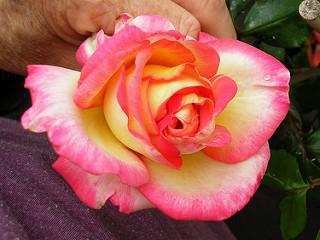

In [8]:
roses = list(data_dir.glob('roses/*'))
print(roses[1])
PIL.Image.open(str(roses[1]))

In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [11]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


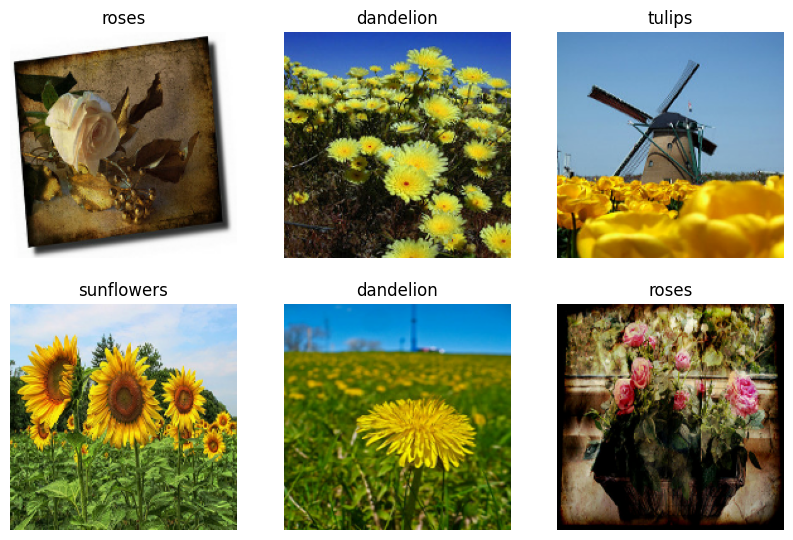

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Model Training

In [13]:
res_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=5,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

res_model.add(pretrained_model)
res_model.add(Flatten())
res_model.add(Dense(512, activation='relu'))
res_model.add(Dense(5, activation='softmax'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [14]:
res_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,639,365 (93.99 MB)

 Trainable params: 1,051,653 (4.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [15]:
res_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
history = res_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)


Epoch 1/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 581s 6s/step - accuracy: 0.6505 - loss: 1.6382 - val_accuracy: 0.8556 - val_loss: 0.4081
Epoch 2/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 598s 6s/step - accuracy: 0.8843 - loss: 0.3250 - val_accuracy: 0.8542 - val_loss: 0.3730
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 559s 6s/step - accuracy: 0.9429 - loss: 0.1787 - val_accuracy: 0.8638 - val_loss: 0.3659
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 563s 6s/step - accuracy: 0.9657 - loss: 0.1150 - val_accuracy: 0.8515 - val_loss: 0.4400
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 519s 5s/step - accuracy: 0.9864 - loss: 0.0677 - val_accuracy: 0.8692 - val_loss: 0.3789


##Evaluation

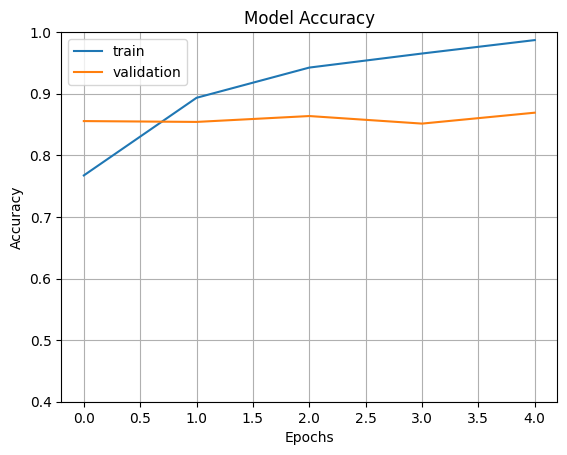

In [17]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

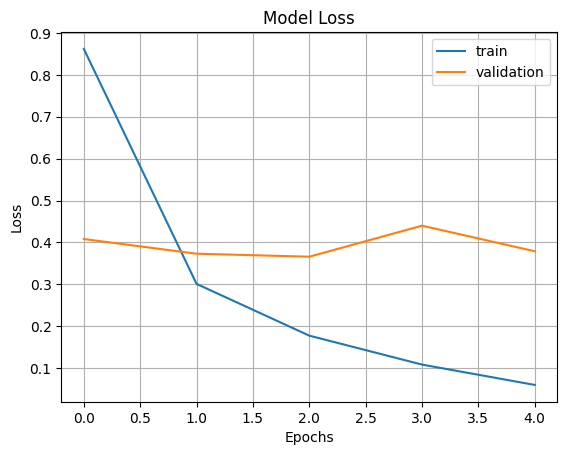

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

Prediction

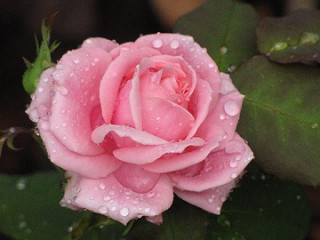

In [23]:
PIL.Image.open(str(roses[0]))

In [19]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 180, 180, 3)


In [21]:
pred=res_model.predict(image)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[3.7322582e-07 9.3809938e-08 9.9995458e-01 1.6640327e-10 4.4963977e-05]]


In [22]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
